complete the code wherever we used #----start       #----end

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack
import scipy
import skimage.metrics

Part A

In [2]:
# here we got an image with size of 8*8 #
image =np.array([[ 33.90241005,  30.54775832,  27.97959216,  29.41620856,
         33.24129806,  35.02424581,  32.94586615,  29.93754577],
       [ 34.69138758,  42.05585559,  50.00845073,  52.39975944,
         49.87770263,  47.92905119,  49.74401583,  52.76852369],
       [ 31.77462629,  49.6598556 ,  69.28626278,  75.85118649,
         70.55222279,  66.14976936,  70.26596303,  77.1838152 ],
       [ 28.6068495 ,  47.44677111,  71.24679329,  85.75392986,
         88.52192546,  87.37539338,  89.03778505,  92.22403802],
       [ 32.34196256,  44.83473787,  65.85785317,  88.43194903,
        105.17498572, 112.09541293, 110.98089772, 107.82000439],
       [ 38.13783369,  46.89900981,  65.4683231 ,  91.29834031,
        116.1083363 , 130.97097637, 134.03007616, 131.82387514],
       [ 35.16966279,  47.82418321,  68.69472555,  92.07094076,
        114.10402987, 133.14028493, 147.87319677, 156.18775704],
       [ 26.92228824,  45.6096369 ,  70.37352354,  90.01813956,
        105.70408236, 125.69502973, 150.94870287, 169.98238288]])
image.shape

(8, 8)

In [3]:
# Matrix Quantization #
Z = np.array([[16,11,10,16,24,40,51,61],
              [12,12,14,19,26,58,60,55],
              [14,13,16,24,40,57,69,56],
              [14,17,22,29,51,87,80,62],
              [18,22,37,56,68,109,103,77],
              [24,35,55,64,81,104,113,92],
              [49,64,78,87,103,121,120,101],
              [72,92,95,98,112,100,130,99]])

In [4]:
# zigzag for generating vector from matrix and vice versa #
zigzag = [   
      [0, 1, 5, 6, 14, 15, 27, 28],
      [2, 4, 7, 13, 16, 26, 29, 42],
      [3, 8, 12, 17, 25, 30, 41, 43],
      [9, 11, 18, 24, 31, 40, 44, 53],
      [10, 19, 23, 32, 39, 45, 52, 54],
      [20, 22, 33, 38, 46, 51, 55, 60],
      [21, 34, 37, 47, 50, 56, 59, 61],
      [35, 36, 48, 49, 57, 58, 62, 63],
  ]

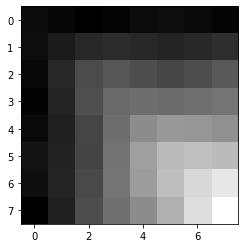

In [5]:
#### in this cell, show us the image in grayscale ####
#----start
plt.imshow(image, cmap='gray')
#----end

In [6]:
#### Define JPEG compression Function #####
def jpeg_compression(image,Z):
  #----start
  subtracted_image = image - (2**(image.shape[0]-1))
  dct_tranformed = scipy.fftpack.dct(scipy.fftpack.dct(subtracted_image,norm='ortho',axis=0),norm='ortho',axis=1)
  divide_with_z = dct_tranformed/Z
  rounded = (np.rint(divide_with_z)).astype(int)
  #----end
  return rounded

In [7]:
jpeg_matrix = jpeg_compression(image,Z)
print(jpeg_matrix)

[[-27 -17  -4  -1   0   0   0   0]
 [-15  11   0   0   0   0   0   0]
 [ -3   0   2   0   0   0   0   0]
 [ -1   0   0   1   0   0   0   0]
 [ -1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


In [8]:
"""change the jpeg_matrix to a vector, like 
a = [-27, -17, -15, -3, 11, -4, -1, 0, 0, -1, -1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 'EOB']"""
####define a mat_2_vec function####
def mat_2_vec(jpeg_matrix,zigzag):
  #----start
  vec=[]
  zigzag_a = np.array(zigzag)
  for i in range(zigzag_a.size):
    index = np.unravel_index(np.argmax(1*(zigzag_a==i),axis=None),zigzag_a.shape)
    vec.append(jpeg_matrix[index])
  
  for j in reversed(range(len(vec))):
    if vec[j] == 0:
      vec = vec[:j]
    elif vec[j] != 0:
      break
  vec.append("EOB")
  #----end
  return vec

In [9]:
vec = mat_2_vec(jpeg_matrix,zigzag)

Part B

In [10]:
#### in this cell,show the vector we got in part A ###
#start
print(vec)
#End

[-27, -17, -15, -3, 11, -4, -1, 0, 0, -1, -1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 'EOB']


In [11]:
####define a vec_2_mat function####
def vector_to_matrix(vector1):
  #----start
  mat = np.zeros_like(image)
  zigzag_a = np.array(zigzag)
  for i in range(len(vector1)-1):
    index = np.unravel_index(np.argmax(1*(zigzag_a==i),axis=None),zigzag_a.shape)
    mat[index] = vector1[i]
  #----end
  return mat


In [12]:
#### Define JPEG Decompression Function #####
def jpeg_decompress(T_hat, Z):
  #----start
  # Please set norm='ortho' in Discrete Cosine Transform Function in fftpack
  # you can use scipy.fftpack for dct and idct
  T_dot = T_hat * Z
  idct_tranformed = scipy.fftpack.idct(scipy.fftpack.idct(T_dot,norm='ortho',axis=0),norm='ortho',axis=1)
  T = idct_tranformed + (2**(image.shape[0]-1))
  #----end
 
  return T

[[ 33.90241005  30.54775832  27.97959216  29.41620856  33.24129806
   35.02424581  32.94586615  29.93754577]
 [ 34.69138758  42.05585559  50.00845073  52.39975944  49.87770263
   47.92905119  49.74401583  52.76852369]
 [ 31.77462629  49.6598556   69.28626278  75.85118649  70.55222279
   66.14976936  70.26596303  77.1838152 ]
 [ 28.6068495   47.44677111  71.24679329  85.75392986  88.52192546
   87.37539338  89.03778505  92.22403802]
 [ 32.34196256  44.83473787  65.85785317  88.43194903 105.17498572
  112.09541293 110.98089772 107.82000439]
 [ 38.13783369  46.89900981  65.4683231   91.29834031 116.1083363
  130.97097637 134.03007616 131.82387514]
 [ 35.16966279  47.82418321  68.69472555  92.07094076 114.10402987
  133.14028493 147.87319677 156.18775704]
 [ 26.92228824  45.6096369   70.37352354  90.01813956 105.70408236
  125.69502973 150.94870287 169.98238288]]


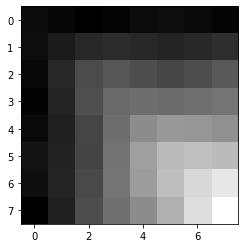

In [13]:
####  Decompress Vector the vector and show the image  ####
T_hat = vector_to_matrix(vec)
img = jpeg_decompress(T_hat,Z)
print(img)
plt.imshow(img, cmap='gray')


Part C

In [14]:
''' in this cell,caculate 3 following metrics using our original image(first cell of part A) and
 our final image in part B(last cell of part B)'''
#----start
mse = skimage.metrics.mean_squared_error(img,image)
psnr = skimage.metrics.peak_signal_noise_ratio(image,img,data_range=(np.max(image)-np.min(image)))
ssim = skimage.metrics.structural_similarity(img,image)

print("mse={}".format(mse))
print("psnr={}".format(psnr))
print("ssim={}".format(ssim))

####print them all####

#----end

mse=9.054369180945465e-18
psnr=213.54178817671354
ssim=1.0000000000000007
